In [1]:
with open('adjektiv.csv') as f:
    data = list(f)

In [2]:
data

['adj,noun\n',
 'wenig,Minuten\n',
 'unglaublich,Blick\n',
 'viel,Holz\n',
 'klar,Optik\n',
 'freundlich,Service\n',
 'jeder,Fall\n',
 'positive,Grundgef\xc3\xbchl\n',
 'gro\xc3\x9f,Anteil\n',
 'weiter,Vorzug\n',
 'jung,Seehotel\n',
 'edel,Spa\n',
 'regional,Gourmetk\xc3\xbcche\n',
 'fantastich,Sky-Lounge\n',
 'japanisch,Badekultur\n',
 'eng,Beziehung\n',
 'japanisch,Thermalbad\n',
 'traditionell,Hei\xc3\x9fwasserbecken\n',
 'vielf\xc3\xa4ltig,Outdoor-Saunalandschaft\n',
 'finnisch,H\xc3\xbcttensauna\n',
 'breit,Angebot\n',
 'besonder,Reiz\n',
 '\xc3\xb6ffentlich,Bereich\n',
 'jeder,Komfort\n',
 'erdenklich,Komfort\n',
 'fl\xc3\xa4chig,Holzinterieur\n',
 'hell,Holzinterieur\n',
 'gro\xc3\x9f,Fenster\n',
 'japanisch,Element\n',
 'hauseigen,Design\n',
 'toll,Seeblick\n',
 'klein,Strand\n',
 'atemberaubend,Blick\n',
 'gut,K\xc3\xbcche\n',
 'entspannt,Atmosph\xc3\xa4re\n',
 'leiblich,Wohl\n',
 'reichhaltig,Fr\xc3\xbchst\xc3\xbccksb\xc3\xbcfett\n',
 'klein,Mittagskarte\n',
 'ausgezeichnet,F

In [3]:
tuples = list(z.decode('utf-8').rstrip('\n').split(',') for z in data)

In [4]:
tuples

[[u'adj', u'noun'],
 [u'wenig', u'Minuten'],
 [u'unglaublich', u'Blick'],
 [u'viel', u'Holz'],
 [u'klar', u'Optik'],
 [u'freundlich', u'Service'],
 [u'jeder', u'Fall'],
 [u'positive', u'Grundgef\xfchl'],
 [u'gro\xdf', u'Anteil'],
 [u'weiter', u'Vorzug'],
 [u'jung', u'Seehotel'],
 [u'edel', u'Spa'],
 [u'regional', u'Gourmetk\xfcche'],
 [u'fantastich', u'Sky-Lounge'],
 [u'japanisch', u'Badekultur'],
 [u'eng', u'Beziehung'],
 [u'japanisch', u'Thermalbad'],
 [u'traditionell', u'Hei\xdfwasserbecken'],
 [u'vielf\xe4ltig', u'Outdoor-Saunalandschaft'],
 [u'finnisch', u'H\xfcttensauna'],
 [u'breit', u'Angebot'],
 [u'besonder', u'Reiz'],
 [u'\xf6ffentlich', u'Bereich'],
 [u'jeder', u'Komfort'],
 [u'erdenklich', u'Komfort'],
 [u'fl\xe4chig', u'Holzinterieur'],
 [u'hell', u'Holzinterieur'],
 [u'gro\xdf', u'Fenster'],
 [u'japanisch', u'Element'],
 [u'hauseigen', u'Design'],
 [u'toll', u'Seeblick'],
 [u'klein', u'Strand'],
 [u'atemberaubend', u'Blick'],
 [u'gut', u'K\xfcche'],
 [u'entspannt', u'Atmo

In [5]:
import networkx as nx

In [6]:
G = nx.Graph()

In [7]:
for x in xrange(len(tuples)):
    edge = (tuples[x][0], tuples[x][1])
    if G.has_edge(*edge):
        G[edge[0]][edge[1]]['weight'] +=1
    else:
        G.add_edge(*edge, weight = 1)

In [8]:
%matplotlib inline

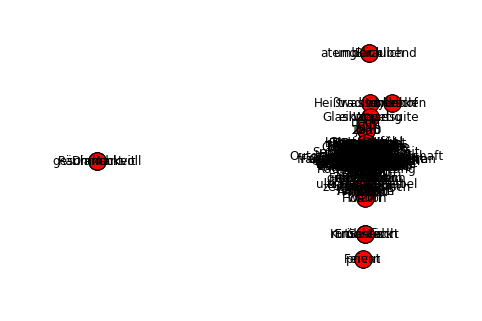

In [9]:
nx.draw(G, with_labels=True, pos=nx.spectral_layout(G))

In [10]:
nx.write_graphml(G, 'adj.graphml')

In [11]:
from networkx.algorithms import bipartite
B = nx.Graph()

In [12]:
B.add_nodes_from([tuples[x][0] for x in xrange(len(tuples))], bipartite=0)
B.add_nodes_from([tuples[x][1] for x in xrange(len(tuples))], bipartite=0)

for x in xrange(len(tuples)):
    edge = (tuples[x][0], tuples[x][1])
    if B.has_edge(*edge):
        B[edge[0]][edge[1]]['weight'] +=1
    else:
        B.add_edge(*edge, weight = 1)

In [13]:
nx.is_connected(B)

False

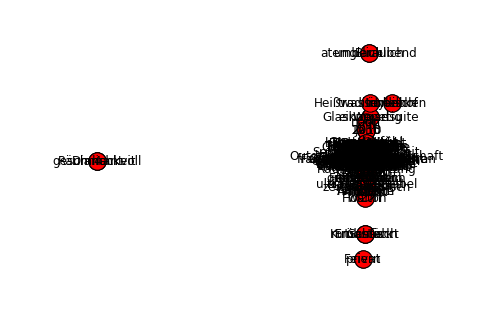

In [14]:
nx.draw(B, with_labels=True, pos=nx.spectral_layout(G))

In [15]:
adj = [tuples[x][0] for x in xrange(len(tuples))]
noun = [tuples[x][1] for x in xrange(len(tuples))]

In [16]:
from collections import Counter

In [17]:
Counter(adj).most_common(10)

[(u'klein', 6),
 (u'edel', 5),
 (u'modern', 4),
 (u'gro\xdf', 4),
 (u'historisch', 4),
 (u'hell', 3),
 (u'romantisch', 3),
 (u'regional', 3),
 (u'weiter', 3),
 (u'opulent', 3)]

In [18]:
Counter(noun).most_common(10)

[(u'Spa', 6),
 (u'Service', 5),
 (u'Angebot', 4),
 (u'Komfort', 4),
 (u'K\xfcche', 4),
 (u'km', 4),
 (u'Lage', 3),
 (u'Jahr', 3),
 (u'Fenster', 3),
 (u'Zimmer', 3)]

In [19]:
import matplotlib.pyplot as plt

In [20]:
adjectives = Counter(adj).most_common(len(adj))
nouns = Counter(noun).most_common(len(noun))

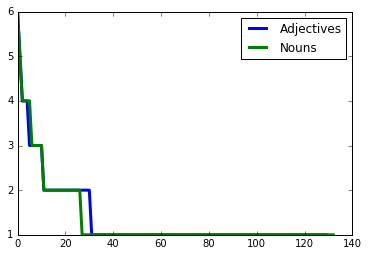

In [21]:
akeys = [x[0] for x in adjectives]
avalues = [x[1] for x in adjectives]
nkeys = [x[0] for x in nouns]
nvalues = [x[1] for x in nouns]

plt.plot(xrange(len(akeys)), avalues, linewidth=3, label='Adjectives')
plt.plot(xrange(len(nkeys)), nvalues, linewidth=3, label='Nouns')
plt.legend()

In [22]:
len(nouns), len(adjectives)

(133, 130)

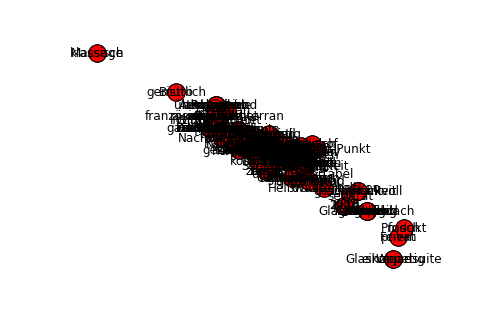

In [23]:
with open('simple_adjektiv.txt') as f:
    data = list(f)
    
tuples = list(z.decode('utf-8').rstrip('\n').split(',') for z in data)

G = nx.Graph()

for x in xrange(len(tuples)):
    edge = (tuples[x][0], tuples[x][1])
    if G.has_edge(*edge):
        G[edge[0]][edge[1]]['weight'] +=1
    else:
        G.add_edge(*edge, weight = 1)

nx.write_graphml(G, 'simple_adj.graphml')        
nx.draw(G, with_labels=True, pos=nx.spectral_layout(G))

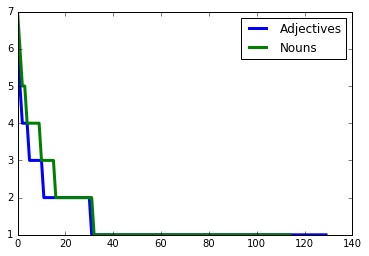

In [24]:
adj = [tuples[x][0] for x in xrange(len(tuples))]
noun = [tuples[x][1] for x in xrange(len(tuples))]

adjectives = Counter(adj).most_common(len(adj))
nouns = Counter(noun).most_common(len(noun))

akeys = [x[0] for x in adjectives]
avalues = [x[1] for x in adjectives]
nkeys = [x[0] for x in nouns]
nvalues = [x[1] for x in nouns]

plt.plot(xrange(len(akeys)), avalues, linewidth=3, label='Adjectives')
plt.plot(xrange(len(nkeys)), nvalues, linewidth=3, label='Nouns')
plt.legend()

In [25]:
len(nouns), len(adjectives)

(115, 130)

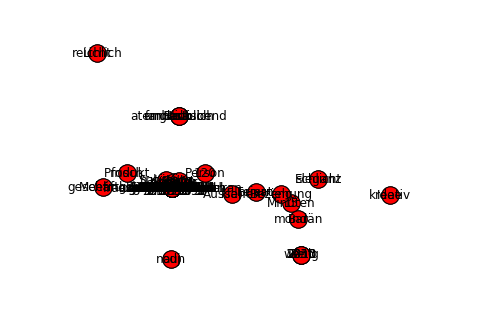

In [26]:
with open('hyper_adjektiv.txt') as f:
    data = list(f)
    
tuples = list(z.decode('utf-8').rstrip('\n').split(',') for z in data)

G = nx.Graph()

for x in xrange(len(tuples)):
    edge = (tuples[x][0], tuples[x][1])
    if G.has_edge(*edge):
        G[edge[0]][edge[1]]['weight'] +=1
    else:
        G.add_edge(*edge, weight = 1)

nx.write_graphml(G, 'hyper_adj.graphml')        
nx.draw(G, with_labels=True, pos=nx.spectral_layout(G))

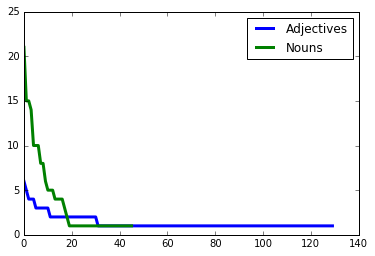

In [27]:
adj = [tuples[x][0] for x in xrange(len(tuples))]
noun = [tuples[x][1] for x in xrange(len(tuples))]

adjectives = Counter(adj).most_common(len(adj))
nouns = Counter(noun).most_common(len(noun))

akeys = [x[0] for x in adjectives]
avalues = [x[1] for x in adjectives]
nkeys = [x[0] for x in nouns]
nvalues = [x[1] for x in nouns]

plt.plot(xrange(len(akeys)), avalues, linewidth=3, label='Adjectives')
plt.plot(xrange(len(nkeys)), nvalues, linewidth=3, label='Nouns')
plt.legend()

In [28]:
len(nouns), len(adjectives)

(46, 130)

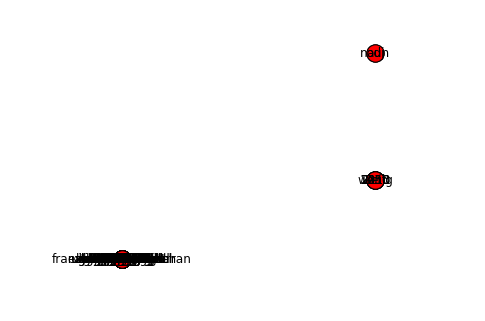

In [29]:
with open('synset_adjektiv.txt') as f:
    data = list(f)
    
tuples = list(z.decode('utf-8').rstrip('\n').split(',') for z in data)

G = nx.Graph()

for x in xrange(len(tuples)):
    edge = (tuples[x][0], tuples[x][1])
    if G.has_edge(*edge):
        G[edge[0]][edge[1]]['weight'] +=1
    else:
        G.add_edge(*edge, weight = 1)

nx.write_graphml(G, 'synset_adj.graphml')        
nx.draw(G, with_labels=True, pos=nx.spectral_layout(G))

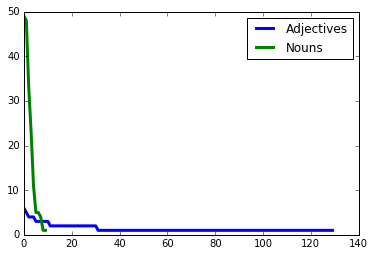

In [30]:
adj = [tuples[x][0] for x in xrange(len(tuples))]
noun = [tuples[x][1] for x in xrange(len(tuples))]

adjectives = Counter(adj).most_common(len(adj))
nouns = Counter(noun).most_common(len(noun))

akeys = [x[0] for x in adjectives]
avalues = [x[1] for x in adjectives]
nkeys = [x[0] for x in nouns]
nvalues = [x[1] for x in nouns]

plt.plot(xrange(len(akeys)), avalues, linewidth=3, label='Adjectives')
plt.plot(xrange(len(nkeys)), nvalues, linewidth=3, label='Nouns')
plt.legend()

In [31]:
len(nouns), len(adjectives)

(10, 130)

In [32]:
with open('adjektiv.csv') as f:
    one = list(f)
with open('simple_adjektiv.txt') as f:
    two = list(f)
with open('hyper_adjektiv.txt') as f:
    three = list(f)
with open('synset_adjektiv.txt') as f:
    four = list(f)

In [33]:
tuples = list(z.decode('utf-8').rstrip('\n').split(',') for z in one)
layer_one = [tuples[x][1] for x in xrange(len(tuples))]

In [34]:
tuples = list(z.decode('utf-8').rstrip('\n').split(',') for z in two)
layer_two = [tuples[x][1] for x in xrange(len(tuples))]

In [35]:
tuples = list(z.decode('utf-8').rstrip('\n').split(',') for z in three)
layer_three = [tuples[x][1] for x in xrange(len(tuples))]

In [36]:
tuples = list(z.decode('utf-8').rstrip('\n').split(',') for z in four)
layer_four = [tuples[x][1] for x in xrange(len(tuples))]

In [37]:
leaf_pairs = zip(layer_one, layer_two)
leaf_pairs

[(u'noun', u'noun'),
 (u'Minuten', u'Minuten'),
 (u'Blick', u'Blick'),
 (u'Holz', u'Holz'),
 (u'Optik', u'Optik'),
 (u'Service', u'Service'),
 (u'Fall', u'Fall'),
 (u'Grundgef\xfchl', u'Gef\xfchl'),
 (u'Anteil', u'Anteil'),
 (u'Vorzug', u'Vorzug'),
 (u'Seehotel', u'Hotel'),
 (u'Spa', u'Spa'),
 (u'Gourmetk\xfcche', u'K\xfcche'),
 (u'Sky-Lounge', u'Lounge'),
 (u'Badekultur', u'Badekultur'),
 (u'Beziehung', u'Beziehung'),
 (u'Thermalbad', u'Thermalbad'),
 (u'Hei\xdfwasserbecken', u'Hei\xdfwasserbecken'),
 (u'Outdoor-Saunalandschaft', u'Landschaft'),
 (u'H\xfcttensauna', u'Sauna'),
 (u'Angebot', u'Angebot'),
 (u'Reiz', u'Reiz'),
 (u'Bereich', u'Bereich'),
 (u'Komfort', u'Komfort'),
 (u'Komfort', u'Komfort'),
 (u'Holzinterieur', u'Holzinterieur'),
 (u'Holzinterieur', u'Holzinterieur'),
 (u'Fenster', u'Fenster'),
 (u'Element', u'Element'),
 (u'Design', u'Design'),
 (u'Seeblick', u'Blick'),
 (u'Strand', u'Strand'),
 (u'Blick', u'Blick'),
 (u'K\xfcche', u'K\xfcche'),
 (u'Atmosph\xe4re', u'Atmo

In [38]:
trunk_pairs = zip(layer_two, layer_three)
trunk_pairs

[(u'noun', u'noun'),
 (u'Minuten', u'Zeit'),
 (u'Blick', u'Blick'),
 (u'Holz', u'Material'),
 (u'Optik', u'Aussehen'),
 (u'Service', u'Service'),
 (u'Fall', u'Fall'),
 (u'Gef\xfchl', u'Gef\xfchl'),
 (u'Anteil', u'Anteil'),
 (u'Vorzug', u'Vorzug'),
 (u'Hotel', u'Hotel'),
 (u'Spa', u'Wellness'),
 (u'K\xfcche', u'Essen'),
 (u'Lounge', u'Bereich'),
 (u'Badekultur', u'Badekultur'),
 (u'Beziehung', u'Beziehung'),
 (u'Thermalbad', u'Wellness'),
 (u'Hei\xdfwasserbecken', u'Wellness'),
 (u'Landschaft', u'Ort'),
 (u'Sauna', u'Wellness'),
 (u'Angebot', u'Angebot'),
 (u'Reiz', u'Gef\xfchl'),
 (u'Bereich', u'Bereich'),
 (u'Komfort', u'Gef\xfchl'),
 (u'Komfort', u'Gef\xfchl'),
 (u'Holzinterieur', u'Material'),
 (u'Holzinterieur', u'Material'),
 (u'Fenster', u'Einrichtung'),
 (u'Element', u'Design'),
 (u'Design', u'Design'),
 (u'Blick', u'Blick'),
 (u'Strand', u'Ort'),
 (u'Blick', u'Blick'),
 (u'K\xfcche', u'Essen'),
 (u'Atmosph\xe4re', u'Gef\xfchl'),
 (u'Wohl', u'Gef\xfchl'),
 (u'Fr\xfchst\xfcck', u

In [39]:
root_pairs = zip(layer_three, layer_four)
root_pairs

[(u'noun', u'noun'),
 (u'Zeit', u'Zeit'),
 (u'Blick', u'Sinn'),
 (u'Material', u'Sinn'),
 (u'Aussehen', u'Sinn'),
 (u'Service', u'Erlebnis'),
 (u'Fall', u'Erlebnis'),
 (u'Gef\xfchl', u'Sinn'),
 (u'Anteil', u'Erlebnis'),
 (u'Vorzug', u'Sinn'),
 (u'Hotel', u'Hotel'),
 (u'Wellness', u'Erlebnis'),
 (u'Essen', u'Essen'),
 (u'Bereich', u'Hotel'),
 (u'Badekultur', u'Sinn'),
 (u'Beziehung', u'Sinn'),
 (u'Wellness', u'Erlebnis'),
 (u'Wellness', u'Erlebnis'),
 (u'Ort', u'Ort'),
 (u'Wellness', u'Erlebnis'),
 (u'Angebot', u'Erlebnis'),
 (u'Gef\xfchl', u'Sinn'),
 (u'Bereich', u'Hotel'),
 (u'Gef\xfchl', u'Sinn'),
 (u'Gef\xfchl', u'Sinn'),
 (u'Material', u'Sinn'),
 (u'Material', u'Sinn'),
 (u'Einrichtung', u'Hotel'),
 (u'Design', u'Sinn'),
 (u'Design', u'Sinn'),
 (u'Blick', u'Sinn'),
 (u'Ort', u'Ort'),
 (u'Blick', u'Sinn'),
 (u'Essen', u'Essen'),
 (u'Gef\xfchl', u'Sinn'),
 (u'Gef\xfchl', u'Sinn'),
 (u'Essen', u'Essen'),
 (u'Essen', u'Essen'),
 (u'Essen ', u'Essen '),
 (u'Bereich', u'Hotel'),
 (u'Au\x

In [40]:
G = nx.Graph()

In [42]:
pairs = [leaf_pairs, trunk_pairs, root_pairs]

for pair in pairs:
    for x in xrange(len(pair)):
        if pair[x][0] != pair[x][1]:
            edge = (pair[x][0], pair[x][1])
            if G.has_edge(*edge):
                G[edge[0]][edge[1]]['weight'] +=1
            else:
                G.add_edge(*edge, weight = 1)

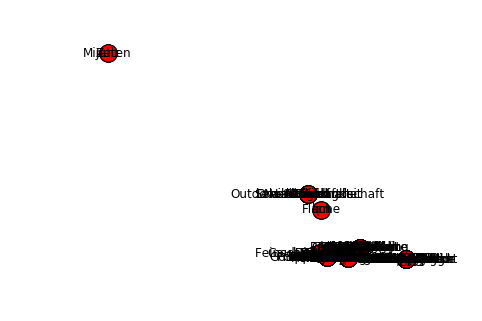

In [43]:
nx.write_graphml(G, 'nouns.graphml')        
nx.draw(G, with_labels=True, pos=nx.spectral_layout(G))

In [60]:
with open('adjektiv.csv') as f:
    one = list(f)
    
tuples = list(z.decode('utf-8').rstrip('\n').split(',') for z in one)

with open('nodes.csv', 'w') as f:
    f.write('id,value')
    f.write('synset')
    for x in xrange(len(tuples)):
        f.write('synset.' + str(tuples[x][0].encode('utf-8')) + '.' + str(tuples[x][1].encode('utf-8') + ',10\n'))